# Activity 7.1 - Naive Bayes implementation

Importa-se as bibliotecas necessárias.

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Carregou-se o *dataset*.

In [41]:
df = pd.read_csv('Naive-Bayes-Classification-Data.csv')
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


Imprime-se um resumo do *dataframe*.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


Visualiza-se as estatísticas descritivas do *dataset*.

In [43]:
df.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


Apresenta-se um gráfico *scatter* que mostra a relação entre Bloodpessure e a Diabetes. 

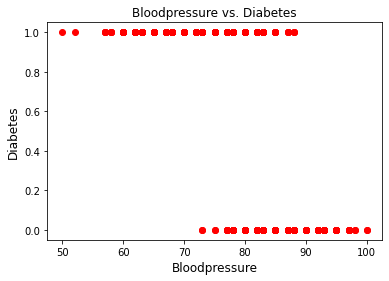

In [44]:
plt.scatter(df['bloodpressure'],df['diabetes'], color='red')
plt.title('Bloodpressure vs. Diabetes')
plt.xlabel('Bloodpressure',fontsize=12)
plt.ylabel('Diabetes',fontsize=12)
plt.show()

Apresenta-se uma tabela de correlação entre as variáveis.

In [45]:
df.corr()

,glucose,bloodpressure,diabetes
glucose,1.000000,-0.164553,0.031585
bloodpressure,-0.164553,1.000000,-0.808303
diabetes,0.031585,-0.808303,1.000000


Visualiza-se o mapa de calor da correlação existente entre as variáveis.

Text(0.5, 1.0, 'Heatmap')

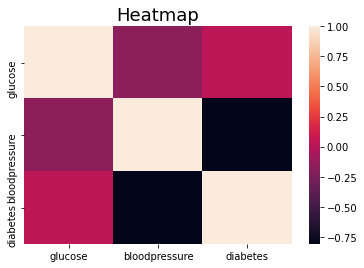

In [46]:
sns.heatmap(df.corr())
plt.title('Heatmap', fontsize=18)

Mostra-se em vários gráficos as relações entre as variáveis do *dataset*.

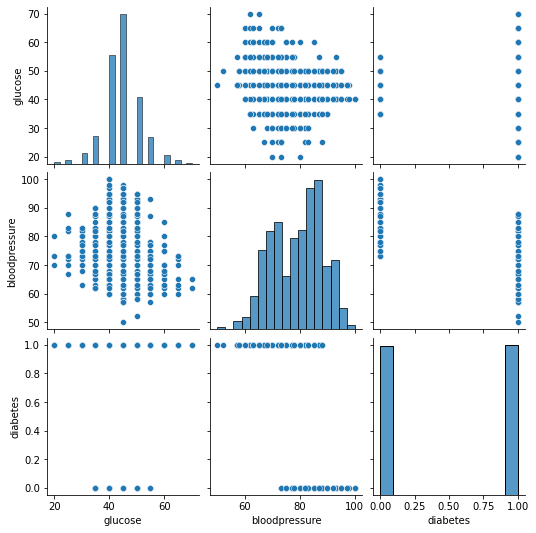

In [47]:
sns.pairplot(df)

Apresenta-se um gráfico flexível com uma distribuição univariada,  utilizou-se a coluna da 'Diabetes' e traçou-se uma estimativa da densidade de Gaussian Kernel.

C:\Users\nunop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diabetes', ylabel='Density'>

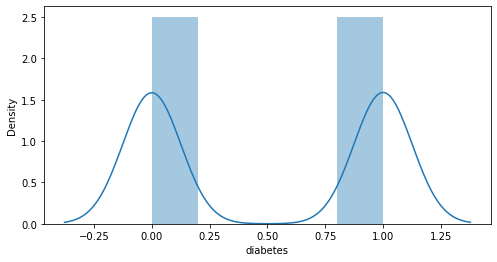

In [48]:
plt.figure(figsize=(8,4))
sns.distplot(df['diabetes'])

Atribui-se à variável x ao *dataframe* excluindo a coluna dos diabetes.<br>
Atribui-se à variável y a coluna dos diabetes.

In [49]:
x=df.drop('diabetes', axis=1)
y=df['diabetes']

Divide-se em *arrays* as variáveis x e y, onde o teste vai conter 25% do train, atribui-se um número a este teste.<br>
Mostra-se a forma dos *arrays*.

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(746, 2) (746,)
(249, 2) (249,)


Atribui-se à variável model o modelo do Gaussian Naive Bayes. <br>
Ajusta-se o *array* ao modelo.

In [51]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

Atribui-se à variável y_pred a previsão do x_test.

In [52]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0], dtype=int64)

Apresenta-se o score da previsão.

In [53]:
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

92.7710843373494

Visualizou-se a confusion_matrix para analisar os falsos positivos/negativos e os verdadeiros positivos/negativos.

In [54]:
confusion_matrix(y_test, y_pred)

array([[105,   9],
       [  9, 126]], dtype=int64)

Utiliza-se o classification_report para visualizar as pontuações de precisão que dão suporte ao modelo.

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       114
           1       0.93      0.93      0.93       135

    accuracy                           0.93       249
   macro avg       0.93      0.93      0.93       249
weighted avg       0.93      0.93      0.93       249



Podemos observar que para este modelo obteve-se uma precisão de 0.93, que é manifestamente bom porque está próximo de 1.0.